# 金融四 陳緯君

# Final Project：個股分析 & 投資組合優化

## Part 1. 個股分析

### 搜集資料：可以透過quandl套件直接抓取美國股票的開高低收以及各項數據，也可以從yahoo finance下載csv檔後讀入python，再進行各種維度的分析

In [63]:
import quandl 

In [64]:
mydata = quandl.get('WIKI/AAPL') 

In [65]:
mydata.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 簡單繪製各項數據的時間序列

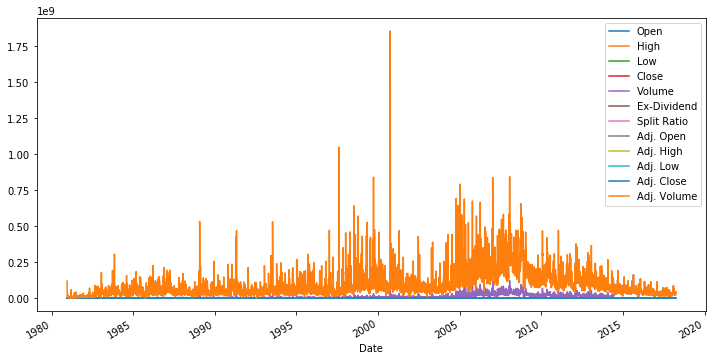

In [68]:
mydata.plot(figsize = (12,6))

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 這邊改用pandas讀取的方式。標的選擇：Google/Apple/Facebook

#### 看同樣都為科技業龍頭，在股價表現會否有所異同

In [26]:
goog = pd.read_csv('/Users/erniechen/Desktop/Google.csv', index_col = 'date')

In [28]:
goog.head()

,open,high,low,close,volume
date,,,,,
2014-04-01,558.710,568.45,558.71,567.16,7932
2014-04-02,565.106,604.83,562.19,567.00,146697
2014-04-03,569.850,587.28,564.13,569.74,5087530
2014-04-04,574.650,577.77,543.00,543.14,6377658
2014-04-07,540.740,548.48,527.15,538.15,4389569


In [29]:
goog.index = pd.to_datetime(goog.index)

In [30]:
aapl = pd.read_csv('/Users/erniechen/Desktop/Apple.csv', index_col = 'date')
fb = pd.read_csv('/Users/erniechen/Desktop/Facebook.csv', index_col = 'date')

In [32]:
aapl.index = pd.to_datetime(aapl.index)
fb.index = pd.to_datetime(fb.index)

### 依據三支股票的收盤價，繪製出時間序列

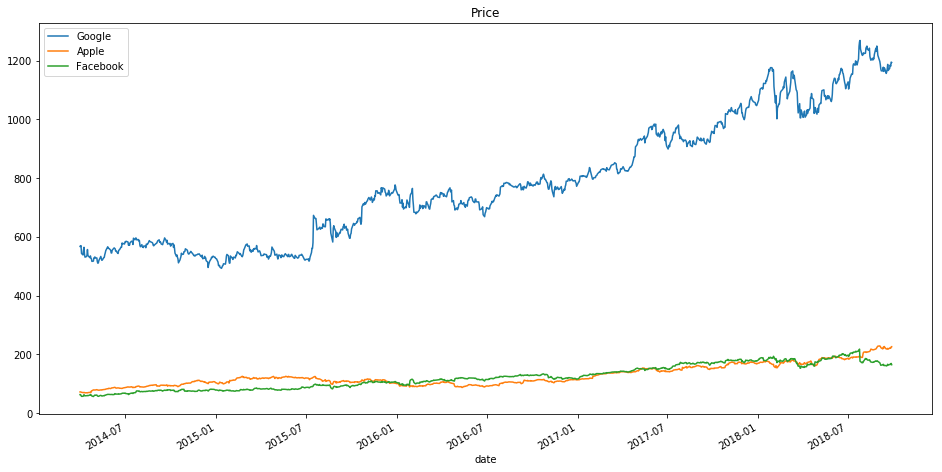

In [35]:
goog['close'].plot(label = 'Google',figsize = (16, 8), title = 'Price')
aapl['close'].plot(label = 'Apple')
fb['close'].plot(label = 'Facebook')
plt.legend()

### 依據三支股票的單日交易量，繪製出時間序列

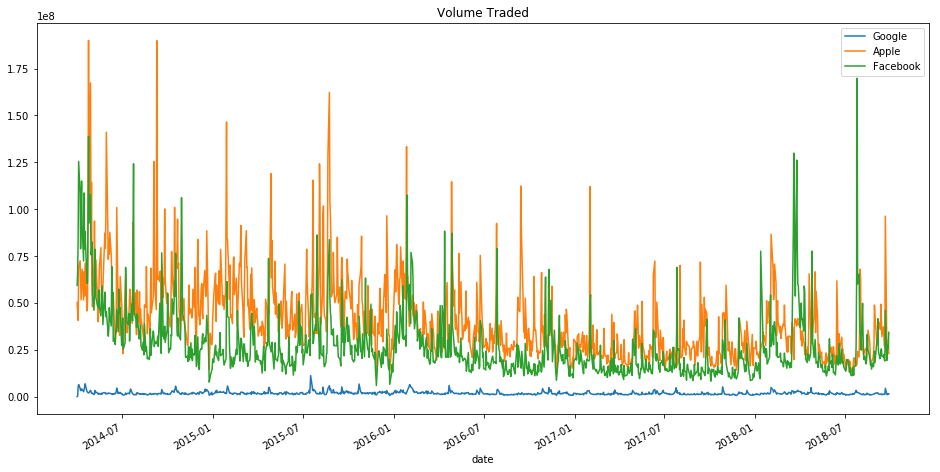

In [37]:
goog['volume'].plot(label = 'Google', figsize = (16,8), title = 'Volume Traded')
aapl['volume'].plot(label = 'Apple')
fb['volume'].plot(label = 'Facebook')
plt.legend()

### 可以看出facebook在交易量爆衝的日期

In [38]:
fb['volume'].idxmax()

Timestamp('2018-07-26 00:00:00')

### 單支股票的單日總交易金額也時常作為分析的參考因素。可以透過一個簡單的計算方法是嘗試代表交易的總交易金額，那就是將交易量乘以收盤價，這不是實際的市值，它只是使用時間序列交易總金額的直觀顯示。

In [41]:
goog['Total Traded'] = goog['close']*goog['volume']
aapl['Total Traded'] = aapl['close']*aapl['volume']
fb['Total Traded'] = fb['close']*fb['volume']

Text(0, 0.5, 'Total Traded')

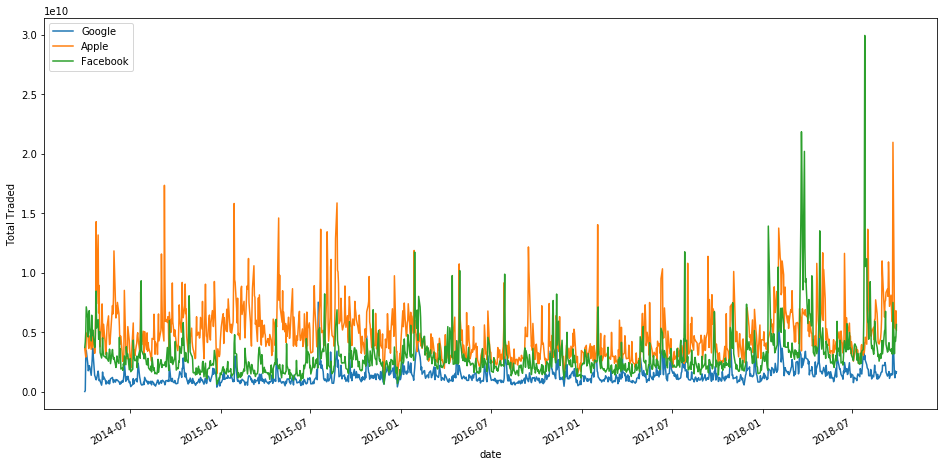

In [42]:
goog['Total Traded'].plot(label='Google',figsize=(16,8))
aapl['Total Traded'].plot(label='Apple')
fb['Total Traded'].plot(label='Facebook')
plt.legend()
plt.ylabel('Total Traded')

### 開始繪製一些技術指標，從移動平均線開始

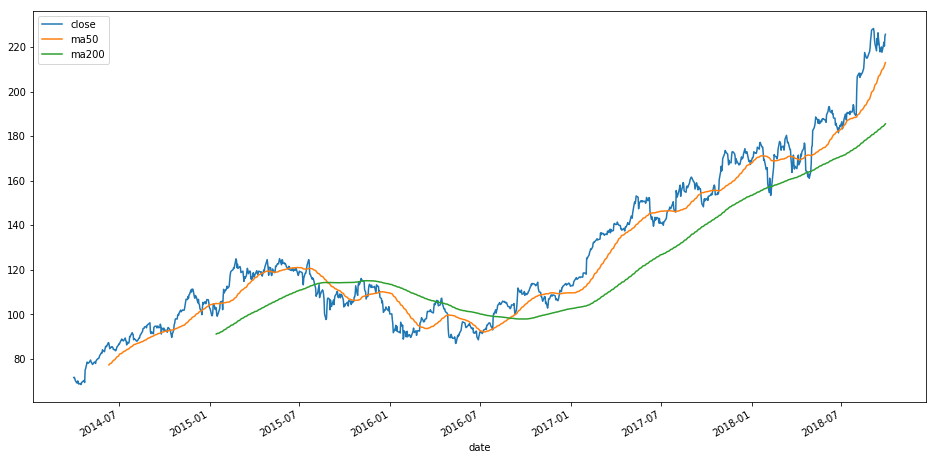

In [45]:
aapl['ma50'] = aapl['close'].rolling(50).mean()
aapl['ma200'] = aapl['close'].rolling(200).mean()
aapl[['close','ma50','ma200']].plot(label = 'Apple', figsize=(16,8))

### 最後讓我們看看這些股票之間是否存在關係，這三家公司都隸屬於科技業。 可以通過散點矩陣圖輕鬆地看到這一點。 

In [46]:
from pandas.plotting import scatter_matrix

In [47]:
tech_comp = pd.concat([goog['close'], aapl['close'], fb['close']], axis = 1)

In [48]:
tech_comp.columns = ['Google Price','Apple Price','Facebook Price']

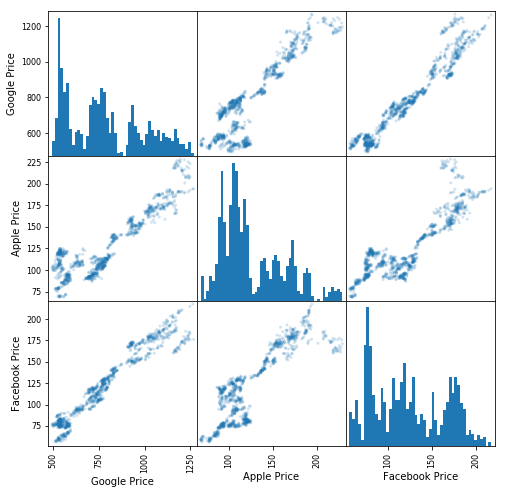

In [50]:
scatter_matrix(tech_comp, figsize=(8,8), alpha=0.2, hist_kwds = {'bins':50});

## 簡單財務計算

### 每日百分比變化
#### 首先，我們將從計算每日百分比變化開始。 每日百分比變化由以下公式定義：

rt = (pt/pt−1)−1
這將 rt（在時間t返回）定義為等於時間 t 處的價格除以時間 t-1（前一天）的價格減去1。基本上這只是告訴你：如果你當天購買股票然後第二天賣掉的百分比增益或損失。 雖然這不一定有助於預測股票的未來價值，但它對分析股票的波動性非常有幫助。 如果每日報酬分佈廣泛，則股票從一天到下一天有更大的波動性。 讓我們計算百分比回報，然後用直方圖繪製，並確定哪個股票最穩定！

In [54]:
goog['returns'] = goog['close'].pct_change(1)

In [55]:
goog.head()

,open,high,low,close,volume,Total Traded,returns
date,,,,,,,
2014-04-01,558.710,568.45,558.71,567.16,7932,4.498713e+06,NaN
2014-04-02,565.106,604.83,562.19,567.00,146697,8.317720e+07,-0.000282
2014-04-03,569.850,587.28,564.13,569.74,5087530,2.898569e+09,0.004832
2014-04-04,574.650,577.77,543.00,543.14,6377658,3.463961e+09,-0.046688
2014-04-07,540.740,548.48,527.15,538.15,4389569,2.362247e+09,-0.009187


In [53]:
aapl['returns'] = aapl['close'].pct_change(1)
fb['returns'] = fb['close'].pct_change(1)

In [56]:
aapl.head()

,open,high,low,close,volume,Total Traded,ma50,ma200,returns
date,,,,,,,,,
2014-04-01,71.1754,71.7194,71.0444,71.6903,50189685,3.598114e+09,NaN,NaN,NaN
2014-04-02,71.7869,71.9325,71.5063,71.8094,44792195,3.216501e+09,NaN,NaN,0.001661
2014-04-03,71.6559,71.8028,71.1596,71.3118,40648111,2.898690e+09,NaN,NaN,-0.006929
2014-04-04,71.4468,71.4719,70.2251,70.3893,68812485,4.843663e+09,NaN,NaN,-0.012936
2014-04-07,69.8863,70.2675,69.0750,69.2841,72462530,5.020501e+09,NaN,NaN,-0.015701


In [57]:
fb.head()

,open,high,low,close,volume,Total Traded,returns
date,,,,,,,
2014-04-01,60.46,62.66,60.24,62.620,59291210,3.712816e+09,NaN
2014-04-02,63.21,63.91,62.21,62.720,66144812,4.148603e+09,0.001597
2014-04-03,62.55,63.17,59.13,59.490,83859330,4.988792e+09,-0.051499
2014-04-04,59.94,60.20,56.32,56.749,125465774,7.120057e+09,-0.046075
2014-04-07,55.90,58.00,55.44,56.950,108487569,6.178367e+09,0.003542


### 繪製各家公司報酬率的直方圖

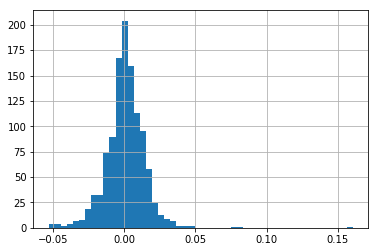

In [58]:
goog['returns'].hist(bins = 50)

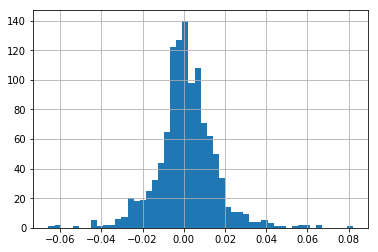

In [59]:
aapl['returns'].hist(bins = 50)

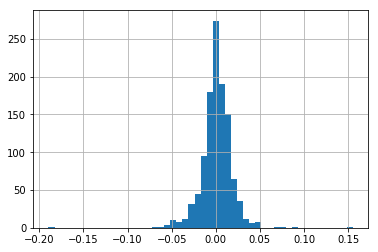

In [60]:
fb['returns'].hist(bins = 50)

### 透過疊加各家公司的直方圖，可以觀察各自的報酬波動率

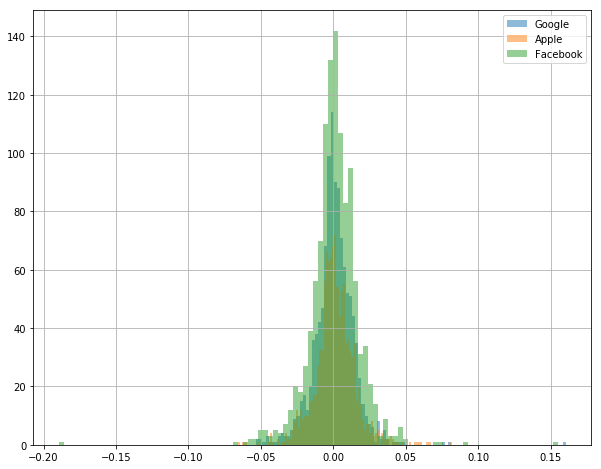

In [61]:
goog['returns'].hist(bins=100,label='Google',figsize=(10,8),alpha=0.5)
aapl['returns'].hist(bins=100,label='Apple',alpha=0.5)
fb['returns'].hist(bins=100,label='Facebook',alpha=0.5)
plt.legend()

### 也可以透過KDE來觀察

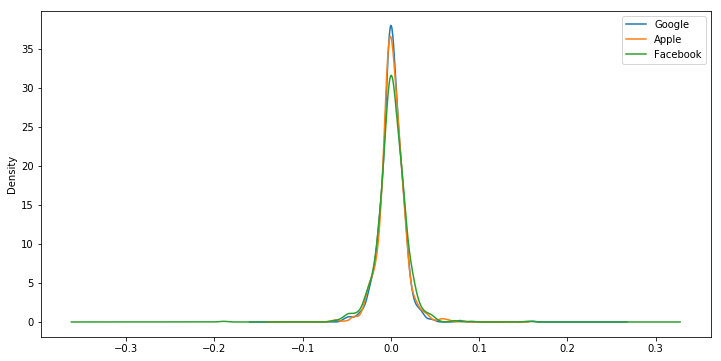

In [62]:
goog['returns'].plot(kind='kde',label='Google',figsize=(12,6))
aapl['returns'].plot(kind='kde',label='Apple')
fb['returns'].plot(kind='kde',label='Facebook')
plt.legend()

### 或者利用箱形圖來觀察報酬率

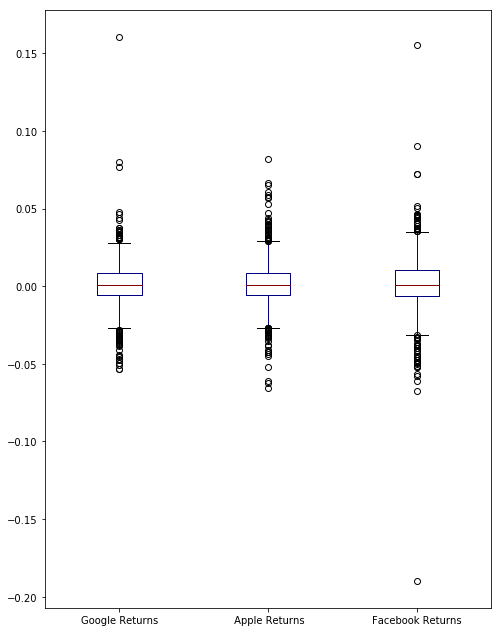

In [69]:
box_df = pd.concat([goog['returns'],aapl['returns'],fb['returns']],axis=1)
box_df.columns = ['Google Returns',' Apple Returns','Facebook Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

### 一樣利用散點矩陣圖去觀察每支股票報酬率的關聯

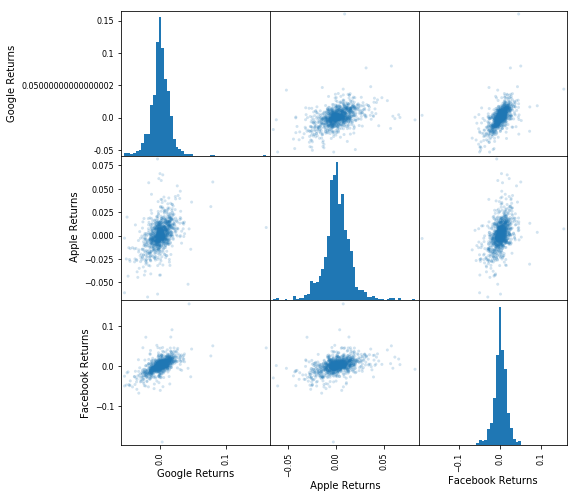

In [70]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});

#### Facebook和Google這兩家公司的股票報酬率看起來確實存在某種可能的關係，若在散點圖中將兩者相互比對，可以更密切地觀察這一點

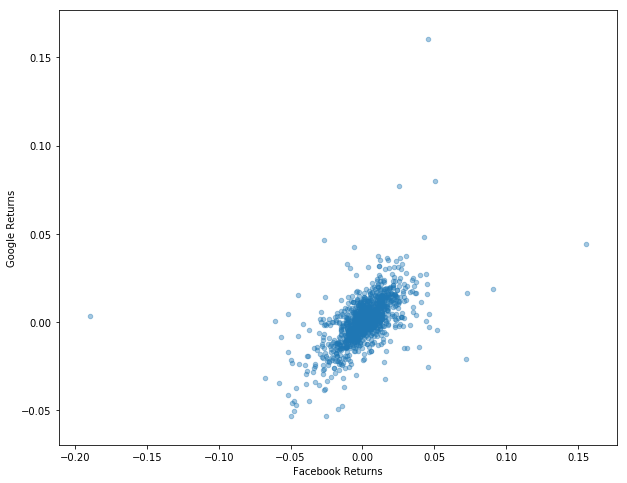

In [71]:
box_df.plot(kind = 'scatter', x = 'Facebook Returns', y = 'Google Returns', alpha=0.4, figsize=(10,8))

## 累積每日回報

#### 隨著每日累積回報，我們試圖回答以下問題：如果我在時間序列開始時在公司投資1美元，今天的價值是多少？ 這不僅僅是當天的股票價格，因為會考慮每日回報。 請記住，我們這裡的簡單計算不會考慮回報股息的股票。 

### 累積每日回報的公式：

ii=(1+rt)∗it−1
在這裡，我們可以看到，我們只是將之前在 i 的t-1投資乘以 1+ 我們的回報百分比。 Pandas使用cumprod（）方法計算令到非常簡單。

df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [72]:
goog['cumulative return'] = (1 + goog['returns']).cumprod()

In [73]:
goog.head()

,open,high,low,close,volume,Total Traded,returns,cumulative return
date,,,,,,,,
2014-04-01,558.710,568.45,558.71,567.16,7932,4.498713e+06,NaN,NaN
2014-04-02,565.106,604.83,562.19,567.00,146697,8.317720e+07,-0.000282,0.999718
2014-04-03,569.850,587.28,564.13,569.74,5087530,2.898569e+09,0.004832,1.004549
2014-04-04,574.650,577.77,543.00,543.14,6377658,3.463961e+09,-0.046688,0.957649
2014-04-07,540.740,548.48,527.15,538.15,4389569,2.362247e+09,-0.009187,0.948850


In [74]:
aapl['cumulative return'] = (1 + aapl['returns']).cumprod()
fb['cumulative return'] = (1 + fb['returns']).cumprod()

### 接著根據時間序列繪製繪製累積回報，可以觀察哪一支股票用1美元投資的報酬最高？哪一支最低？

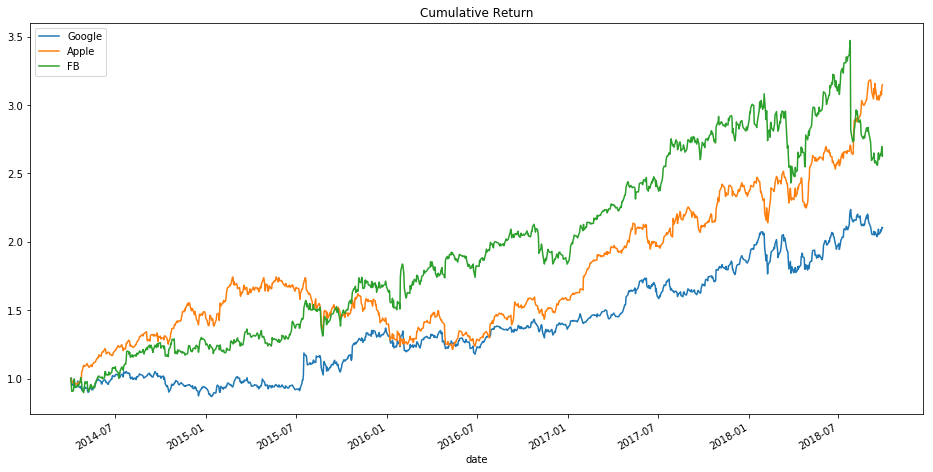

In [76]:
goog['cumulative return'].plot(label='Google',figsize=(16,8),title='Cumulative Return')
aapl['cumulative return'].plot(label='Apple')
fb['cumulative return'].plot(label='FB')
plt.legend()

## Part 2. 投資組合優化

### 一樣先做資料整理，在part 2我選擇用另外四支股票組成一個投資組合，再對其進行分析以及後續的優化

In [3]:
ibm = pd.read_csv('/Users/erniechen/Desktop/IBM_CLOSE.csv', index_col = 'Date', parse_dates = True)
intc = pd.read_csv('/Users/erniechen/Desktop/INTC_CLOSE.csv', index_col = 'Date', parse_dates = True)
msft = pd.read_csv('/Users/erniechen/Desktop/MSFT_CLOSE.csv', index_col = 'Date', parse_dates = True)
amzn = pd.read_csv('/Users/erniechen/Desktop/AMZN_CLOSE.csv', index_col = 'Date', parse_dates = True)

In [4]:
ibm.head()

,Adj. Close
Date,
2012-01-03,157.578371
2012-01-04,156.935540
2012-01-05,156.191208
2012-01-06,154.398046
2012-01-09,153.594506


In [5]:
ibm.iloc[0]['Adj. Close']

157.57837143485

### 接著利用原先的收盤價做出累計報酬率，再根據給定的配置權重，算出四支股票在這段時間的價值

In [6]:
for stock_df in (ibm, intc, msft, amzn):
    stock_df['Cumulative Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [7]:
for stock_df, alloc in zip([ibm, intc, msft, amzn], [0.3, 0.2, 0.4, 0.1]):
    stock_df['Allocation'] = stock_df['Cumulative Return']*alloc

In [9]:
for stock_df in [ibm, intc, msft, amzn]:
    stock_df['Position Value'] = stock_df['Allocation']*1000000

In [10]:
ibm.head()

,Adj. Close,Cumulative Return,Allocation,Position Value
Date,,,,
2012-01-03,157.578371,1.000000,0.300000,300000.000000
2012-01-04,156.935540,0.995921,0.298776,298776.167472
2012-01-05,156.191208,0.991197,0.297359,297359.098229
2012-01-06,154.398046,0.979817,0.293945,293945.249597
2012-01-09,153.594506,0.974718,0.292415,292415.458937


### 將四支個股的數據集合成一個投組，以便進行接下來的作業

In [11]:
port_val = pd.concat([ibm['Position Value'], intc['Position Value'], 
                      msft['Position Value'], amzn['Position Value']], axis = 1)

In [13]:
port_val.columns = ['IBM', 'INTEL', 'MICROSOFT', 'AMAZON']

In [15]:
port_val['Total'] = port_val.sum(axis = 1)

In [16]:
port_val.head()

,IBM,INTEL,MICROSOFT,AMAZON,Total
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,298776.167472,204645.476773,409490.005604,99150.980283,1.012063e+06
2012-01-05,297359.098229,207008.964955,413674.575005,99206.836843,1.017249e+06
2012-01-06,293945.249597,205786.471068,420026.153559,101999.664861,1.021758e+06
2012-01-09,292415.458937,207538.712306,414571.268448,99737.474166,1.014263e+06


### 整體投資組合的走勢繪圖 / 將四支個股的走勢繪圖

Text(0.5, 1.0, 'Total Portfolio Value')

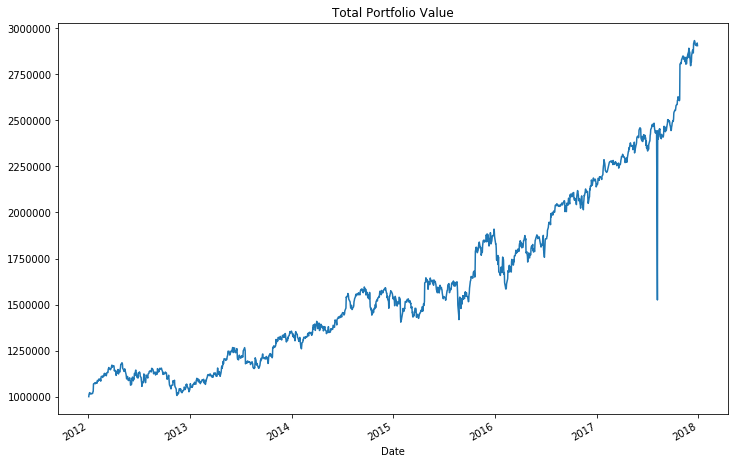

In [17]:
port_val['Total'].plot(figsize = (12,8))
plt.title('Total Portfolio Value')

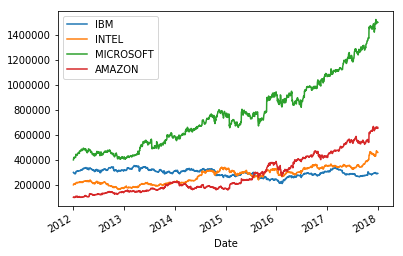

In [18]:
port_val.drop('Total', axis = 1).plot(kind = 'line')

### 對投資組合的報酬率進行敘述性統計，以便投資人作投資評估

In [19]:
port_val['Daily Return'] = port_val['Total'].pct_change(1)

In [20]:
port_val.head()

,IBM,INTEL,MICROSOFT,AMAZON,Total,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,298776.167472,204645.476773,409490.005604,99150.980283,1.012063e+06,0.012063
2012-01-05,297359.098229,207008.964955,413674.575005,99206.836843,1.017249e+06,0.005125
2012-01-06,293945.249597,205786.471068,420026.153559,101999.664861,1.021758e+06,0.004432
2012-01-09,292415.458937,207538.712306,414571.268448,99737.474166,1.014263e+06,-0.007335


In [21]:
cum_re = 100 * (port_val['Total'][-1]/port_val['Total'][0]-1)
cum_re

190.62033071365906

In [22]:
port_val['Daily Return'].mean()

0.0009162910388363117

In [23]:
port_val['Daily Return'].std()

0.021227389122445692

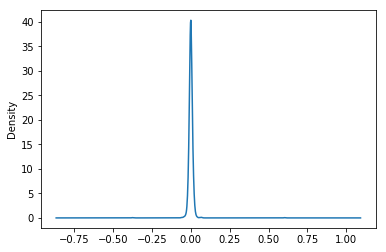

In [24]:
port_val['Daily Return'].plot(kind = 'kde')

### 計算夏普比率Sharpe Ratio(是投資理論中評估投資績效的重要指標，此處忽略無風險利率)

In [25]:
SR = port_val['Daily Return'].mean()/port_val['Daily Return'].std()
SR

0.04316550818147636

In [26]:
ASR = (252**0.5)*SR #年化後的夏普比率更具參考價值
ASR

0.6852311991834624

## 投資組合優化

### 在確定金融資產的種類後，卻發現投資組合的夏普比率不甚理想，可以透過調整資產權重來優化投資組合

In [28]:
ibm = pd.read_csv('/Users/erniechen/Desktop/IBM_CLOSE.csv', index_col = 'Date', parse_dates = True)
intc = pd.read_csv('/Users/erniechen/Desktop/INTC_CLOSE.csv', index_col = 'Date', parse_dates = True)
msft = pd.read_csv('/Users/erniechen/Desktop/MSFT_CLOSE.csv', index_col = 'Date', parse_dates = True)
amzn = pd.read_csv('/Users/erniechen/Desktop/AMZN_CLOSE.csv', index_col = 'Date', parse_dates = True)

In [29]:
stocks = pd.concat([ibm, intc, msft, amzn], axis = 1)
stocks.columns = ['IBM', 'INTEL', 'MICROSOFT', 'AMAZON']

In [30]:
stocks.head()

,IBM,INTEL,MICROSOFT,AMAZON
Date,,,,
2012-01-03,157.578371,20.083438,22.792249,179.03
2012-01-04,156.935540,20.549924,23.332995,177.51
2012-01-05,156.191208,20.787258,23.571435,177.61
2012-01-06,154.398046,20.664499,23.933352,182.61
2012-01-09,153.594506,20.840454,23.622529,178.56


### 透過簡單統計看出四支個股在這段時間的表現以及彼此之間的相關性

In [31]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

IBM          0.000048
INTEL        0.000644
MICROSOFT    0.000975
AMAZON       0.001417
dtype: float64

In [32]:
stocks.pct_change(1).corr()

,IBM,INTEL,MICROSOFT,AMAZON
IBM,1.000000,0.406496,0.388318,0.232009
INTEL,0.406496,1.000000,0.515904,0.273827
MICROSOFT,0.388318,0.515904,1.000000,0.373317
AMAZON,0.232009,0.273827,0.373317,1.000000


In [33]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,IBM,INTEL,MICROSOFT,AMAZON
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.004079,0.023227,0.023725,-0.008490
2012-01-05,-0.004743,0.011549,0.010219,0.000563
2012-01-06,-0.011481,-0.005906,0.015354,0.028152
2012-01-09,-0.005204,0.008515,-0.012987,-0.022178


### 在實務上更常使用log return

In [35]:
log_re = np.log(stocks/stocks.shift(1))
log_re.head()

,IBM,INTEL,MICROSOFT,AMAZON
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.004088,0.022962,0.023448,-0.008526
2012-01-05,-0.004754,0.011483,0.010167,0.000563
2012-01-06,-0.011547,-0.005923,0.015237,0.027763
2012-01-09,-0.005218,0.008479,-0.013072,-0.022428


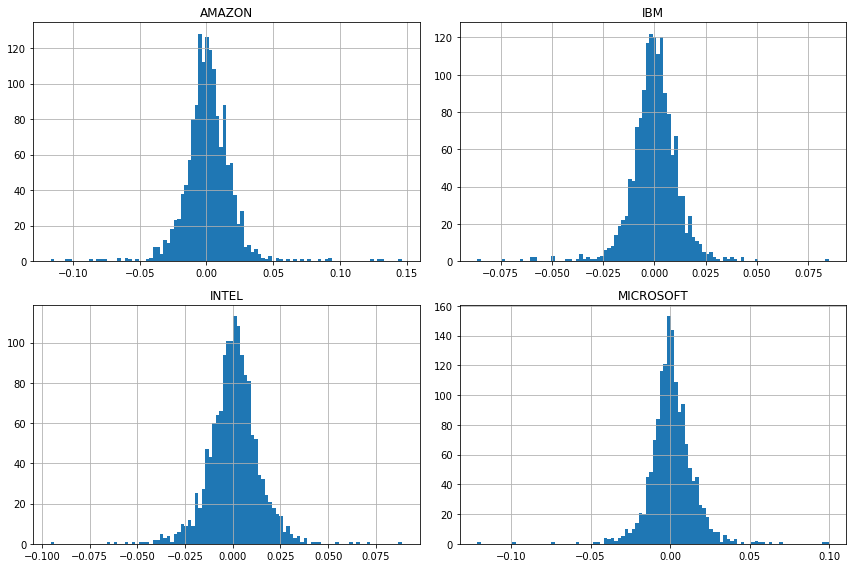

In [36]:
log_re.hist(bins = 100, figsize = (12, 8))
plt.tight_layout()

In [38]:
log_re.mean() * 252 #觀察年化後的報酬率

IBM         -0.004472
INTEL        0.138842
MICROSOFT    0.221159
AMAZON       0.313864
dtype: float64

## 投資組合優化：以下會分別使用1.蒙地卡羅模擬法 2.優化函數解

### 蒙地卡羅法：要先製造一組隨機的權重以及放置return、volatility以及夏普比率的array，並模擬15000次

In [41]:
np.random.seed(101)
num_times = 15000

all_weights = np.zeros((num_times, len(stocks.columns)))
ret_arr = np.zeros(num_times)
vol_arr = np.zeros(num_times)
sharpe_arr = np.zeros(num_times)

for idx in range(num_times):
    
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    all_weights[idx,:] = weights
    
    ret_arr[idx] = np.sum(log_re.mean()*weights)*252
    vol_arr[idx] = np.sqrt(np.dot(weights.T, np.dot(log_re.cov()*252, weights)))
    sharpe_arr[idx] = ret_arr[idx]/vol_arr[idx]

### 求出最大夏普比率的值、位址以及權重

In [42]:
sharpe_arr.argmax()

11711

In [43]:
all_weights[11711, :]

array([0.00434524, 0.05888011, 0.49405136, 0.44272329])

In [44]:
max_sr_ret = ret_arr[11711]

In [45]:
max_sr_vol = vol_arr[11711]

### 畫出效率前緣並點出最佳投資組合的位置

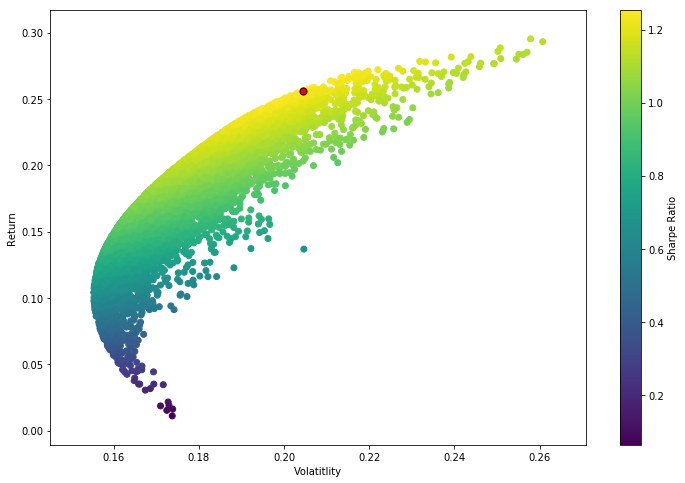

In [46]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatitlity')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c = 'red', s = 50, edgecolors = 'black')

## 利用優化函數找出最佳投資組合

### 以下則是以數學方法找出投資組合中最佳(報酬率最高 波動率最小)
### 要使用的方法是找出最小的負sharpe ratio

In [47]:
def get_stats(weights):
    weights = np.array(weights)
    exp_ret = np.sum(log_re.mean()*weights)*252
    exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_re.cov()*252, weights)))
    SR = exp_ret/exp_vol
    return np.array([exp_ret, exp_vol, SR])

### 接下來要運用scipy這個套件中的函數進行最佳化(使用scipy中的最小化函數)

In [48]:
from scipy.optimize import minimize

In [49]:
def neg_sr(weights):
    return get_stats(weights)[2] * -1

In [50]:
def check_sum(weights):
    return np.sum(weights) -1

In [51]:
cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1))
init_guess = [0.25, 0.25, 0.25, 0.25]

### 接著要將以上條件放入最小化函數中

In [52]:
opt_results = minimize(neg_sr, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)

### 即可看到最佳化的結果

In [53]:
opt_results

     fun: -1.255698928442597
     jac: array([ 4.46642354e-01, -1.21293962e-03,  1.20505691e-04,  3.72380018e-05])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.        , 0.06337608, 0.48875426, 0.44786966])

In [54]:
get_stats(opt_results.x)

array([0.25746169, 0.20503457, 1.25569893])

### 最後便是繪製出效率前緣

In [55]:
frontier_y = np.linspace(0, 0.3, 100)

In [56]:
def mini_vol(weights):
    return get_stats(weights)[1]

In [57]:
frontier_vol = []

for possible_ret in frontier_y:
    cons = ({'type':'eq', 'fun': check_sum},
            {'type':'eq', 'fun': lambda w: get_stats(w)[0] - possible_ret})
    
    result = minimize(mini_vol, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)
    frontier_vol.append(result['fun'])

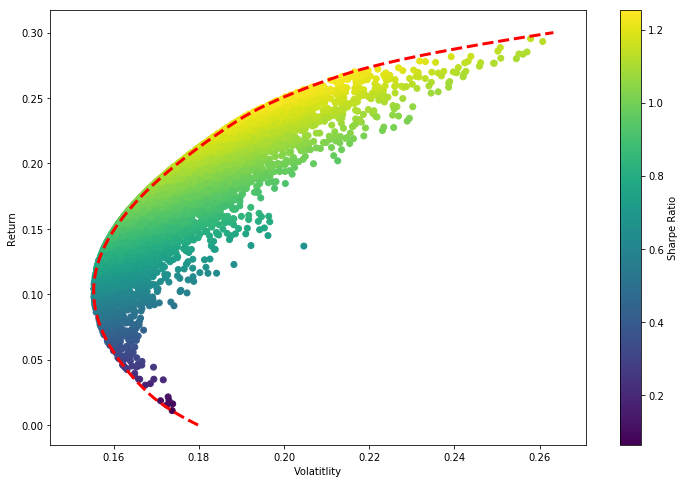

In [58]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatitlity')
plt.ylabel('Return')

plt.plot(frontier_vol, frontier_y, 'r--', lw = 3)

## 最後可以發現透過蒙地卡羅和優化函數找出的夏普比率是非常相近的(1.25左右)